In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shahriariit/opendataset/master/Parkinson%20(1).csv')

In [ ]:
df.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0


In [ ]:
df.describe()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,0.023468,0.028671,59.328203,63.674583,74.198478,80.187240,81.505404,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,0.014402,0.016610,14.541946,15.621195,16.442566,17.187765,17.395830,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,22.224723,26.274029,33.156101,36.494025,36.908213,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,0.014986,0.019180,50.558623,54.237537,63.879230,69.823899,70.435013,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,59.742330,64.844019,75.457858,80.992704,82.354119,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,68.686365,73.439434,85.652177,92.330509,93.500429,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,0.120760,0.142440,101.206326,109.651117,120.712830,128.289325,129.985236,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [ ]:
print(df.shape)

(240, 47)


In [ ]:
df

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,0.008835,0.010232,0.015297,28.530790,28.625326,37.778480,43.165327,44.085825,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,0.008436,0.011578,0.015473,33.617211,36.264629,45.526764,52.135100,53.417630,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,0.015937,0.015441,0.021133,56.853169,64.663462,76.610752,82.794477,83.509902,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,0.041295,0.027626,0.037650,60.096871,67.562663,79.713585,86.826843,87.382895,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188

In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 46 columns]


In [ ]:
#apply feature seletion method
selector = SelectKBest(f_classif, k = 10)
X = selector.fit_transform(X, Y)
X.shape

(240, 10)

In [ ]:
X,Y

(array([[77.62672931, 77.53804238,  1.32908548, ...,  1.38035208,
          1.40367796,  1.41670492],
        [79.98922811, 80.26978338,  1.18717747, ...,  1.21337701,
          1.32286963,  1.31899874],
        [78.93050194, 79.03350989,  1.34629565, ...,  1.27608829,
          1.43805276,  1.30546904],
        ...,
        [82.79447732, 83.50990204,  1.36746286, ...,  1.28155141,
          1.34319347,  1.38336413],
        [86.82684289, 87.38289541,  1.33518835, ...,  1.46132282,
          1.36193715,  1.42306182],
        [81.62330602, 82.41153803,  1.28074398, ...,  1.53176361,
          1.30421438,  1.31569149]]), 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Status, Length: 240, dtype: int64)

In [ ]:
y = Y

In [ ]:
X

array([[77.62672931, 77.53804238,  1.32908548, ...,  1.38035208,
         1.40367796,  1.41670492],
       [79.98922811, 80.26978338,  1.18717747, ...,  1.21337701,
         1.32286963,  1.31899874],
       [78.93050194, 79.03350989,  1.34629565, ...,  1.27608829,
         1.43805276,  1.30546904],
       ...,
       [82.79447732, 83.50990204,  1.36746286, ...,  1.28155141,
         1.34319347,  1.38336413],
       [86.82684289, 87.38289541,  1.33518835, ...,  1.46132282,
         1.36193715,  1.42306182],
       [81.62330602, 82.41153803,  1.28074398, ...,  1.53176361,
         1.30421438,  1.31569149]])

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Status, Length: 240, dtype: int64

In [ ]:
df = pd.DataFrame(X)
df['Status']=y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,77.626729,77.538042,1.329085,1.284922,1.209225,1.367540,1.407701,1.380352,1.403678,1.416705,0
1,79.989228,80.269783,1.187177,1.256340,1.246375,1.370643,1.331232,1.213377,1.322870,1.318999,0
2,78.930502,79.033510,1.346296,1.339797,1.334447,1.362594,1.412304,1.276088,1.438053,1.305469,0
3,84.367682,84.252430,1.498323,1.561722,1.590510,1.493691,1.501200,1.323993,1.551286,1.604008,0
4,91.033967,91.145189,1.613747,1.501956,1.258557,1.557644,1.508468,1.610694,1.640088,1.297536,0
...,...,...,...,...,...,...,...,...,...,...,...
235,43.165327,44.085825,1.149514,1.137022,1.146306,1.134914,1.116409,1.099866,1.167076,1.107824,1
236,52.135100,53.417630,1.108991,1.101534,1.055106,1.119685,1.107477,1.101819,1.126667,1.096073,1
237,82.794477,83.509902,1.367463,1.274210,1.364689,1.391191,1.335189,1.281551,1.343193,1.383364,1
238,86.826843,87.382895,1.335188,1.319729,1.348004,1.329500,1.327629,1.461323,1.361937,1.423062,1


In [ ]:
print(df.shape)
print(df.info())

(240, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
 2   2       240 non-null    float64
 3   3       240 non-null    float64
 4   4       240 non-null    float64
 5   5       240 non-null    float64
 6   6       240 non-null    float64
 7   7       240 non-null    float64
 8   8       240 non-null    float64
 9   9       240 non-null    float64
 10  Status  240 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 20.8 KB
None


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,80.187240,81.505404,1.349270,1.354317,1.338350,1.346094,1.343238,1.337717,1.341472,1.346381,0.500000
std,17.187765,17.395830,0.215538,0.212376,0.216225,0.210776,0.198174,0.204978,0.204085,0.221484,0.501045
min,36.494025,36.908213,0.727609,0.771259,0.611540,0.813607,0.766458,0.741690,0.811942,0.643132,0.000000
25%,69.823899,70.435013,1.212101,1.218042,1.199275,1.229496,1.208624,1.197868,1.189515,1.202525,0.000000
50%,80.992704,82.354119,1.338791,1.342907,1.331794,1.338213,1.351015,1.337233,1.349243,1.347297,0.500000
75%,92.330509,93.500429,1.496511,1.497181,1.473760,1.466926,1.488878,1.485597,1.475330,1.506674,1.000000
max,128.289325,129.985236,1.857084,1.840846,1.976153,2.071291,1.860588,1.785984,1.943331,1.918392,1.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0         22.506610
1         23.065417
2          0.284410
3          0.279138
4          0.274485
5          0.237430
6          0.280254
7          0.287729
8          0.285815
9          0.304149
Status     1.000000
dtype: float64


In [ ]:
df = df[~((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis =1)]

In [ ]:
print(df.shape)

(226, 11)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,77.626729,77.538042,1.329085,1.284922,1.209225,1.367540,1.407701,1.380352,1.403678,1.416705,0
1,79.989228,80.269783,1.187177,1.256340,1.246375,1.370643,1.331232,1.213377,1.322870,1.318999,0
2,78.930502,79.033510,1.346296,1.339797,1.334447,1.362594,1.412304,1.276088,1.438053,1.305469,0
3,84.367682,84.252430,1.498323,1.561722,1.590510,1.493691,1.501200,1.323993,1.551286,1.604008,0
4,91.033967,91.145189,1.613747,1.501956,1.258557,1.557644,1.508468,1.610694,1.640088,1.297536,0
...,...,...,...,...,...,...,...,...,...,...,...
235,43.165327,44.085825,1.149514,1.137022,1.146306,1.134914,1.116409,1.099866,1.167076,1.107824,1
236,52.135100,53.417630,1.108991,1.101534,1.055106,1.119685,1.107477,1.101819,1.126667,1.096073,1
237,82.794477,83.509902,1.367463,1.274210,1.364689,1.391191,1.335189,1.281551,1.343193,1.383364,1
238,86.826843,87.382895,1.335188,1.319729,1.348004,1.329500,1.327629,1.461323,1.361937,1.423062,1


In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

           0          1         2  ...         7         8         9
0  77.626729  77.538042  1.329085  ...  1.380352  1.403678  1.416705
1  79.989228  80.269783  1.187177  ...  1.213377  1.322870  1.318999
2  78.930502  79.033510  1.346296  ...  1.276088  1.438053  1.305469
3  84.367682  84.252430  1.498323  ...  1.323993  1.551286  1.604008
4  91.033967  91.145189  1.613747  ...  1.610694  1.640088  1.297536

[5 rows x 10 columns]


In [ ]:
y = Y

In [ ]:
X, y

(             0          1         2  ...         7         8         9
 0    77.626729  77.538042  1.329085  ...  1.380352  1.403678  1.416705
 1    79.989228  80.269783  1.187177  ...  1.213377  1.322870  1.318999
 2    78.930502  79.033510  1.346296  ...  1.276088  1.438053  1.305469
 3    84.367682  84.252430  1.498323  ...  1.323993  1.551286  1.604008
 4    91.033967  91.145189  1.613747  ...  1.610694  1.640088  1.297536
 ..         ...        ...       ...  ...       ...       ...       ...
 235  43.165327  44.085825  1.149514  ...  1.099866  1.167076  1.107824
 236  52.135100  53.417630  1.108991  ...  1.101819  1.126667  1.096073
 237  82.794477  83.509902  1.367463  ...  1.281551  1.343193  1.383364
 238  86.826843  87.382895  1.335188  ...  1.461323  1.361937  1.423062
 239  81.623306  82.411538  1.280744  ...  1.531764  1.304214  1.315691
 
 [226 rows x 10 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1

In [ ]:
classifier_name = []
accuracy = []
roc = []
f_measure = []
geometric_mean = []
sensitivity = []
specificity = []
false_positive_rate = []
false_negative_rate = []
fpositive_rate_curve = []
tpositive_rate_curve = []

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)
y_pred = cross_val_predict(estimator = dt, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred, average = 'weighted'))
print('F-Measure :      ', f1_score(y, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('DT')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)





Accuracy :        0.7389380530973452
ROC :             0.7386212299255777
F-Measure :       0.7388306138811468
Geometric Mean :  0.7386211619767274
Sensitivity :     0.7389380530973452
Specificity :     0.7383044067538104
False Positive Rate (Fall Out): 0.26169559324618963
False Negative Rate (Miss Rate): 0.26106194690265483


In [ ]:
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('KNN')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.6858407079646017
ROC :             0.6847238542890716
F-Measure :       0.6602870813397128
Geometric Mean :  0.684722943437964
Sensitivity :     0.6858407079646017
Specificity :     0.6836070006135416
False Positive Rate (Fall Out): 0.3163929993864584
False Negative Rate (Miss Rate): 0.3141592920353983


In [ ]:
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GNB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.8141592920353983
ROC :             0.8141010575793185
F-Measure :       0.8108108108108109
Geometric Mean :  0.8141010554964985
Sensitivity :     0.8141592920353983
Specificity :     0.8140428231232386
False Positive Rate (Fall Out): 0.1859571768767614
False Negative Rate (Miss Rate): 0.18584070796460173


In [ ]:
sv = svm.SVC(gamma='auto')
y_pred = cross_val_predict(estimator = sv, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SVM')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.6858407079646017
ROC :             0.6847238542890716
F-Measure :       0.6602870813397128
Geometric Mean :  0.684722943437964
Sensitivity :     0.6858407079646017
Specificity :     0.6836070006135416
False Positive Rate (Fall Out): 0.3163929993864584
False Negative Rate (Miss Rate): 0.3141592920353983


In [ ]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('LR')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7964601769911505
ROC :             0.7963963963963964
F-Measure :       0.7927927927927928
Geometric Mean :  0.7963963938424143
Sensitivity :     0.7964601769911505
Specificity :     0.7963326158016425
False Positive Rate (Fall Out): 0.2036673841983575
False Negative Rate (Miss Rate): 0.20353982300884954


In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('MLP')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5088495575221239
ROC :             0.5
F-Measure :       0.0
Geometric Mean :  0.4999216791975145
Sensitivity :     0.5088495575221239
Specificity :     0.4911504424778761
False Positive Rate (Fall Out): 0.5088495575221239
False Negative Rate (Miss Rate): 0.4911504424778761


In [ ]:
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = X, y = y, cv = 10) 

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('XGB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7654867256637168
ROC :             0.7651782216999609
F-Measure :       0.7579908675799087
Geometric Mean :  0.7651781595087636
Sensitivity :     0.7654867256637168
Specificity :     0.7648697177362049
False Positive Rate (Fall Out): 0.23513028226379507
False Negative Rate (Miss Rate): 0.23451327433628322


In [ ]:
randomfForest = RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(estimator = randomfForest, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('RF')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7522123893805309
ROC :             0.7511946729338034
F-Measure :       0.7333333333333334
Geometric Mean :  0.7511939835337859
Sensitivity :     0.7522123893805309
Specificity :     0.7501769564870757
False Positive Rate (Fall Out): 0.24982304351292428
False Negative Rate (Miss Rate): 0.24778761061946908


In [ ]:
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_pred = cross_val_predict(estimator = extraTree, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('ET')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7168141592920354
ROC :             0.7160987074030553
F-Measure :       0.7009345794392524
Geometric Mean :  0.7160983500001387
Sensitivity :     0.7168141592920354
Specificity :     0.7153832555140751
False Positive Rate (Fall Out): 0.2846167444859249
False Negative Rate (Miss Rate): 0.2831858407079646


In [ ]:
adaBoost = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(estimator = adaBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('AdaBoost')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7345132743362832
ROC :             0.7342734038386212
F-Measure :       0.7272727272727273
Geometric Mean :  0.7342733646584896
Sensitivity :     0.7345132743362832
Specificity :     0.7340335333409592
False Positive Rate (Fall Out): 0.2659664666590408
False Negative Rate (Miss Rate): 0.2654867256637168


In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_pred = cross_val_predict(estimator = GradientBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7212389380530974
ROC :             0.7213866039952996
F-Measure :       0.7200000000000001
Geometric Mean :  0.7213865888818844
Sensitivity :     0.7212389380530974
Specificity :     0.721534269937502
False Positive Rate (Fall Out): 0.278465730062498
False Negative Rate (Miss Rate): 0.27876106194690264


In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
y_pred = cross_val_predict(estimator = sgd, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:

print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SGD')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5
ROC :             0.49475127301214256
F-Measure :       0.28025477707006374
Geometric Mean :  0.49472343082993614
Sensitivity :     0.5
Specificity :     0.48950254602428517
False Positive Rate (Fall Out): 0.5104974539757148
False Negative Rate (Miss Rate): 0.5


In [ ]:
list_of_result_parameters = list(zip(classifier_name, accuracy, roc, f_measure, geometric_mean,sensitivity,specificity,false_positive_rate, false_negative_rate))

In [ ]:
df_result = pd.DataFrame(list_of_result_parameters, columns = ['Classifier','Accuracy', 'ROC', 'F-Measure', 'Geometric Mean', 'Sensitivity', 'Specificity', 'False Positive Rate (Fall Out)', 'False Negative Rate (Miss Rate)'])

In [ ]:
df_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
0,DT,0.738938,0.738621,0.738831,0.738621,0.738938,0.738304,0.261696,0.261062
1,KNN,0.685841,0.684724,0.684474,0.684723,0.685841,0.683607,0.316393,0.314159
2,GNB,0.814159,0.814101,0.814159,0.814101,0.814159,0.814043,0.185957,0.185841
3,SVM,0.685841,0.684724,0.684474,0.684723,0.685841,0.683607,0.316393,0.314159
4,LR,0.796460,0.796396,0.796460,0.796396,0.796460,0.796333,0.203667,0.203540
5,MLP,0.508850,0.500000,0.343212,0.499922,0.508850,0.491150,0.508850,0.491150
6,XGB,0.765487,0.765178,0.765390,0.765178,0.765487,0.764870,0.235130,0.234513
7,RF,0.752212,0.751195,0.751276,0.751194,0.752212,0.750177,0.249823,0.247788
8,ET,0.716814,0.716099,0.716280,0.716098,0.716814,0.715383,0.284617,0.283186
9,AdaBoost,0.734513,0.734273,0.734451,0.734273,0.734513,0.734034,0.265966,0.265487


In [ ]:
#No need to sort the table //df_final_result = df_result.sort_values(['Accuracy','F-Measure'], ascending = False)

In [ ]:
#df_final_result

In [ ]:
from google.colab import files
# create excel writer object
writer = pd.ExcelWriter('ANOVAf-testBasedResult.xlsx')
# write dataframe to excel
df_result.to_excel(writer)
# save the excel
writer.save()
files.download('ANOVAf-testBasedResult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

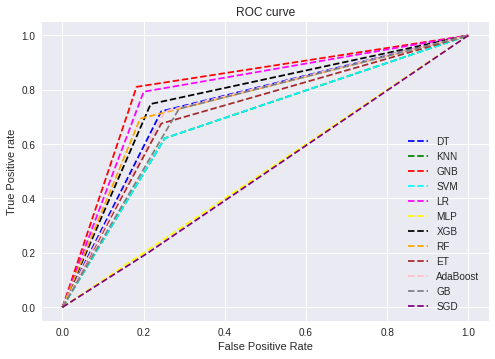

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpositive_rate_curve[0], tpositive_rate_curve[0], linestyle='--',color='blue', label='DT')
plt.plot(fpositive_rate_curve[1], tpositive_rate_curve[1], linestyle='--',color='green', label='KNN')
plt.plot(fpositive_rate_curve[2], tpositive_rate_curve[2], linestyle='--',color='red', label='GNB')
plt.plot(fpositive_rate_curve[3], tpositive_rate_curve[3], linestyle='--',color='cyan', label='SVM')
plt.plot(fpositive_rate_curve[4], tpositive_rate_curve[4], linestyle='--',color='magenta', label='LR')
plt.plot(fpositive_rate_curve[5], tpositive_rate_curve[5], linestyle='--',color='yellow', label='MLP')
plt.plot(fpositive_rate_curve[6], tpositive_rate_curve[6], linestyle='--',color='black', label='XGB')
plt.plot(fpositive_rate_curve[7], tpositive_rate_curve[7], linestyle='--',color='orange', label='RF')
plt.plot(fpositive_rate_curve[8], tpositive_rate_curve[8], linestyle='--',color='brown', label='ET')
plt.plot(fpositive_rate_curve[9], tpositive_rate_curve[9], linestyle='--',color='pink', label='AdaBoost')
plt.plot(fpositive_rate_curve[10], tpositive_rate_curve[10], linestyle='--',color='gray', label='GB')
plt.plot(fpositive_rate_curve[11], tpositive_rate_curve[11], linestyle='--',color='purple', label='SGD')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ANOVAf-testBasedResult_ROC_curve.png',dpi=300)
plt.show();
files.download('ANOVAf-testBasedResult_ROC_curve.png')